In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from urllib2 import Request, urlopen
import json
from datetime import date, datetime
import matplotlib.dates as mdates
import ast
import os.path
from glob import glob
from datetime import datetime
import pytz

In [3]:
data = []
ChannelName ="Mathematics"
pattern = os.path.join('DiscordScrapes/Mathematics/', '*.json')
for file_name in glob(pattern):
    data.append(json.load(open(file_name)))
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)
timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)
userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

Number of messages: 585785
585785
585785
8030
2932
Number of messages: 585785
Number of users: 2932


                          Date  count
0      2017-11-03 07:38:43.187      1
1      2017-10-24 21:23:43.383      1
2      2017-09-30 20:28:09.676      1
3      2017-11-03 07:50:58.652      1
4      2017-09-17 20:53:09.484      1
5      2017-10-15 11:59:46.905      1
6      2017-11-26 22:47:45.606      1
7      2017-10-13 01:28:25.893      1
8      2017-09-30 23:57:33.902      1
9      2017-11-14 18:16:33.554      1
10     2017-11-27 15:53:16.975      1
11     2017-10-09 07:31:33.499      1
12     2017-10-28 11:52:43.650      1
13     2017-10-15 06:23:17.704      1
14     2017-10-28 12:16:31.907      1
15     2017-10-31 02:53:02.980      1
16     2017-09-17 21:26:26.837      1
17     2017-11-13 12:33:04.443      1
18     2017-11-10 17:33:44.037      1
19     2017-10-18 16:11:33.350      1
20     2017-11-28 17:34:01.001      1
21     2017-11-18 17:13:50.490      1
22     2017-10-16 02:46:12.926      1
23     2017-10-10 16:10:55.295      1
24     2017-11-03 08:20:25.794      1
25     2017-

"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig('MathematicsMessagesBar_Month.png')"

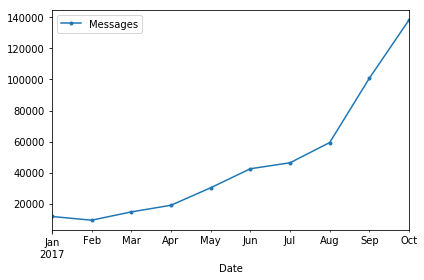

In [4]:
df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
print df
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()

"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""

gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])

del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])

"""gb = df.groupby([(df.index.year),(df.index.month)])
gb.columns = ["Year", "Month", "Messages"]
print gb
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
gb = gb.reindex(columns=["Date", "Messages"])"""

gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

gb.index = gb['Date']

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')

gbMessageGrowthMath = gb



"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsMessagesBar_Month.png')"""



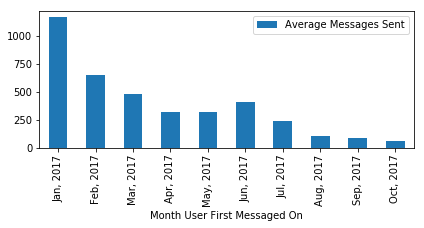

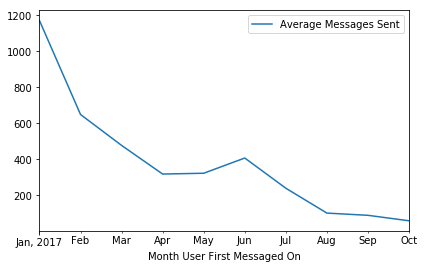

In [12]:
#Time referential graph vs average number of posts
#Compares Time of user to amount of posts
#Join time by months?

#Get date, user, user id
df = pd.DataFrame({'date':timestamps, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1

#https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby

#Find first post for each user
gb = df.groupby('user')["Date"].min()
#print len(gb)
#print df

#Add users posts together as an aggregate count of their posts
gb2 = df.groupby(["user"])["count"].agg({'count':sum})
#print len(gb2)

#Group together data
bigdata = pd.concat([gb, gb2], axis=1)
bigdata = bigdata.reset_index(drop=True)
#print bigdata
#print bigdata

#Remove November Data for consistency:
bigdata = bigdata[(bigdata['Date'].dt.year != 2017) | (bigdata['Date'].dt.month != 11)]

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
bigdata.index = bigdata['Date']
gb3 = bigdata.groupby([(bigdata.index.year),(bigdata.index.month)]).mean().reset_index()
#print gb3

gb3.columns = ["Year", "Month", "Average Messages Sent"]
gb3['Month User First Messaged On'] = gb3[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb3['Month User First Messaged On'] = pd.to_datetime(gb3['Month User First Messaged On'])
del gb3['Year']
del gb3['Month']

#Bar
ax = gb3.set_index('Month User First Messaged On').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsTimeRefVsAveragePostsBar.png')

gbAuthorMessagesMath = gb3

#Line
ax = gb3.set_index('Month User First Messaged On').plot()
plt.tight_layout()
ax.set_xticklabels(gb3['Month User First Messaged On'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsTimeRefVsAveragePostsLine.png')

#Find time_referential = start date of posting

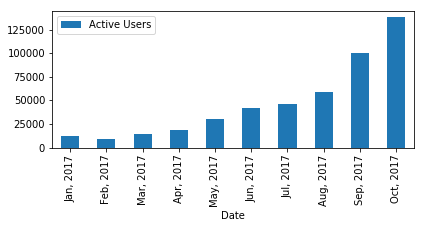

In [7]:
#Number of active users per month

#active user = user who posts at least once
df = pd.DataFrame({'date':timestamps, 'messages':message, 'user':authorName, 'user_id': realIDs})
df['Date'] = pd.to_datetime(df['date'],unit='ms')
df['count'] = 1
df.index = df['Date']
del df['date']

#Sort
df.sort_values(by='Date')
#print df
"""#Seperate dataframe into months so that you can remove duplicates later

#Group by month for number of active users
gb = df.groupby([(df.index.year),(df.index.month)])
print gb
"""

#List of dfs by month and year
dfList = []
for region, df_region in df.groupby([(df.index.year),(df.index.month)]):
    #print(len(df_region))
    dfList.append(df_region)
    
#Drop duplicates from timerange https://stackoverflow.com/questions/47341275/pandas-drop-duplicates-within-date-range
#Goal: Drop duplicates within each month
#Alt: drop duplicates for each subset dataframe
#Dropping duplicates so that all users within a month period is unique
#print "asdfasdf"
cleandfList =[]
for dataframe in dfList:
    #Use user_id since users can have the same name!!!
    dataframe = dataframe.drop_duplicates(subset="user_id")
    #print len(dataframe)
    cleandfList.append(dataframe)
    
#Combine dataframes
bigDF = pd.concat(cleandfList)
#print len(bigDF)
del bigDF['messages']
del bigDF['user']
del bigDF['user_id']
bigDF.index = bigDF['Date']
#print bigDF

#Count total of active users by months
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Active Users"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]

gbActiveUserMath = gb

#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('MathematicsActiveUsers.png')


Number of messages: 546775
546775
546775
3284
1848
Number of messages: 546775
Number of users: 1848
2017-06-26 01:44:57.139000
2017-11-30 02:11:53.598000
                         count
Date                          
2017-08-13 15:32:21.529      1
2017-08-13 15:36:15.736      1
2017-08-13 15:34:25.843      1
2017-08-13 15:36:27.063      1
2017-07-30 05:36:59.709      1
2017-08-01 09:10:45.495      1
2017-10-14 12:11:32.859      1
2017-10-24 17:56:36.405      1
2017-11-25 18:00:46.739      1
2017-11-15 01:00:31.193      1
2017-10-15 17:48:59.388      1
2017-09-12 04:35:18.036      1
2017-09-15 13:12:36.276      1
2017-07-26 09:08:15.122      1
2017-11-25 07:52:21.869      1
2017-07-22 08:57:00.605      1
2017-07-20 20:26:53.512      1
2017-07-27 13:47:35.366      1
2017-07-27 22:58:13.869      1
2017-08-20 02:25:07.796      1
2017-10-14 23:06:05.575      1
2017-09-04 18:23:05.061      1
2017-07-21 05:06:57.265      1
2017-08-03 01:08:50.361      1
2017-11-24 22:26:06.120      1
2017-11-1

"#Graph\nax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig('LightinDarknessActiveUsers.png')"

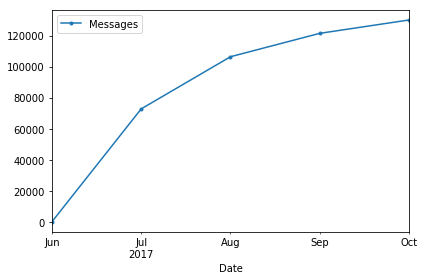

In [20]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "LightinDarkness"
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()

print df

#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""

gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])

del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]
gb.index = gb['Date']

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')
gbMessageGrowthLID = gb


"""#Graph
ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig('LightinDarknessActiveUsers.png')"""


Number of messages: 65637
65637
65637
4964
4580
Number of messages: 65637
Number of users: 4580
2016-12-04 11:53:22.391000
2017-11-30 16:45:04.077000
                         count
Date                          
2017-10-27 13:34:50.765      1
2017-11-20 01:58:39.086      1
2017-05-28 22:26:36.879      1
2017-05-18 06:39:55.442      1
2017-05-09 17:20:55.376      1
2017-06-19 20:53:20.805      1
2017-05-08 18:42:26.663      1
2017-05-09 14:57:05.666      1
2017-06-19 00:44:47.500      1
2017-05-08 18:38:08.329      1
2017-07-17 21:14:38.819      1
2017-05-09 02:08:46.596      1
2017-05-18 06:38:45.474      1
2017-05-09 02:15:53.200      1
2017-05-09 08:34:31.256      1
2017-08-13 18:21:33.251      1
2017-05-08 23:22:18.354      1
2017-09-15 00:34:31.544      1
2017-05-31 04:58:52.133      1
2017-06-19 20:53:27.309      1
2017-05-08 23:11:46.701      1
2017-05-08 23:15:00.681      1
2017-05-18 06:38:55.864      1
2017-07-06 13:04:42.838      1
2017-10-17 21:47:06.864      1
2017-10-11 18

"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"

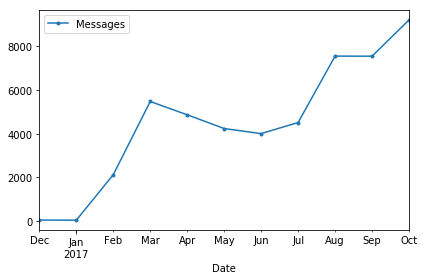

In [6]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "MemeHarem"
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()

print df

#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""

gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])

del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])

#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]
gb.index = gb['Date']

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')
gbMessageGrowthMeme = gb

"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"""



In [7]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "Minecraft"
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
print df.index.min()
print df.index.max()





Number of messages: 1630225
1630225
1630225
20970
10926
Number of messages: 1630225
Number of users: 10926
2017-04-13 21:55:38.960000
2017-12-01 00:11:51.207000


"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"

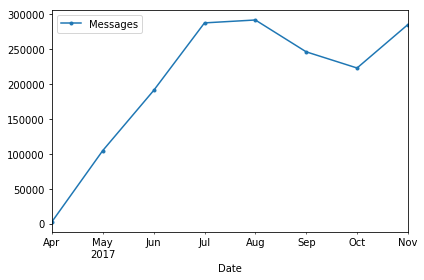

In [8]:
#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""

gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])


#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 12)]
gb.index = gb['Date']

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')
gbMessageGrowthMinecraft = gb

"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"""

Number of messages: 272193
272193
272193
10483
8876
Number of messages: 272193
Number of users: 8876


"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"

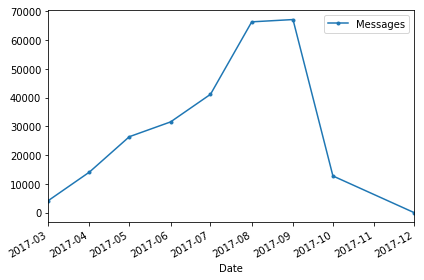

In [9]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "PingandSalarsHotel"
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
#print df.index.min()
#print df.index.max()

#print df

#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""

gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])


#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 11)]
gb.index = gb['Date']

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')
gbMessageGrowthPingandSalarsHotel = gb

"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"""



Number of messages: 681018
681018
681018
23989
13485
Number of messages: 681018
Number of users: 13485


"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"

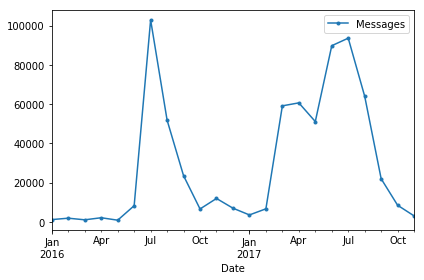

In [10]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "Pokemon"
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
#print df.index.min()
#print df.index.max()

#print df

#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""

gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])


#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 12)]
gb.index = gb['Date']

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')
gbMessageGrowthPokemonGo = gb

"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"""



Number of messages: 452155
452155
452155
11271
8916
Number of messages: 452155
Number of users: 8916


"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"

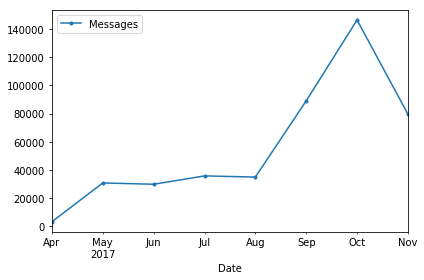

In [11]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "PurpleArmy"
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
#print df.index.min()
#print df.index.max()

#print df

#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])

del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])


#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 12)]
gb.index = gb['Date']

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')
gbMessageGrowthPurpleArmy = gb



"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')"""



Number of messages: 947801
947801
947801
16168
8906
Number of messages: 947801
Number of users: 8906


"ax = gb.set_index('Date').plot(kind='bar')\nplt.tight_layout()\nax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))\nretweets = ax\nretweetsImage = retweets.get_figure()\nretweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')\n\n"

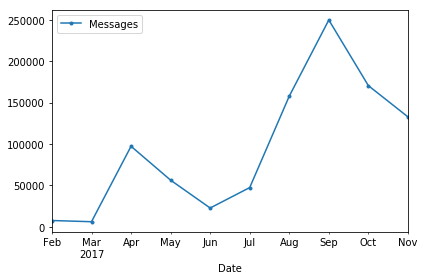

In [12]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "RickAndMorty"
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
#print df.index.min()
#print df.index.max()

#print df

#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""
gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])


#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 12)]
gb.index = gb['Date']
gbMessageGrowthRickAndMorty = gb

retweets = gb.plot(style='.-')

plt.tight_layout()
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')

"""ax = gb.set_index('Date').plot(kind='bar')
plt.tight_layout()
ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
retweets = ax
retweetsImage = retweets.get_figure()
retweetsImage.savefig(ChannelName + 'MessagesBar_Month.png')

"""

Number of messages: 86551
86551
86551
2918
2385
Number of messages: 86551
Number of users: 2385
         Date  Messages
0  2016-05-01         2
1  2016-06-01       323
2  2016-07-01       291
3  2016-08-01       291
4  2016-09-01       736
5  2016-10-01       411
6  2016-11-01       274
7  2016-12-01       294
8  2017-01-01       411
9  2017-02-01       301
10 2017-03-01       215
11 2017-04-01       346
12 2017-05-01       670
13 2017-06-01       861
14 2017-07-01       811
15 2017-08-01       648
16 2017-09-01       403
17 2017-10-01       418
18 2017-11-01     78845


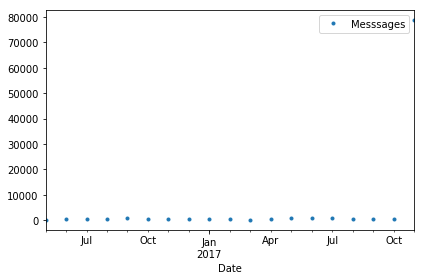

In [13]:
#Data will not include channels that are restricted to only admins for posting privilidges
data = []
ChannelName = "YGOProPercy"
#For now, just include all json files
pattern = os.path.join('DiscordScrapes/' + ChannelName + '/', '*.json')
for file_name in glob(pattern):
    #print file_name
    data.append(json.load(open(file_name)))
#Combine data


#For better idea about data, view: https://dht.chylex.com/build/viewer.html



#Combine data
messageData = []
userList = []
userIndex = []
channelInfo = []
for item in data:
    for majorkey, subdict in item.iteritems():
        if majorkey == "data":
            messageData.append(subdict)

        if majorkey == "meta":
            for majorkey2, subdict2 in subdict.iteritems():
                if majorkey2 == "users":
                    userList.append(subdict2)
                if majorkey2 == "userindex":
                    userIndex.append(subdict2)
                if majorkey2 == "servers":
                    channelInfo.append(subdict2)

timestamps = []
message = []
messageID = []
author = []
authorID = []
authorName = []
imageData = []
for a in messageData:   
    for b in a:

        for c in a[b]:
            temp = a[b][c]
            #print type(a[b][c])
            for key, value in temp.iteritems():
                if key == "m": 
                    message.append(value)
                if key == "u":
                    authorID.append(value)
                if key == "t":
                    timestamps.append(value)
                if key =="e":
                    imageData.append(value)
print "Number of messages: " + str(len(message))
print len(authorID)
print len(timestamps)

userIndex2 = []
authorName = []
realIDs = []
time_referential = []
firstpost = []

for i in userIndex:
    userIndex2 = userIndex2 + i
print len(userIndex2)
userList2 =[]

for i in userList:
    userList2 = dict(userList2, **i)

print len(userList2)

for index in authorID:
    realID = userIndex2[index]
    realIDs.append(realID)
    authorName.append(userList2[realID]["name"])
print "Number of messages: " + str(len(authorName))
print "Number of users: " + str(len(userList2))

#Timeseries for amount of messages
#Taking out the first ___ rows since messages weren't collected at that time. 

df = pd.DataFrame({'Date':timestamps})
df['count'] = 1
#print df

#Convert timestamps after pandas https://stackoverflow.com/a/34669712/4698963

#Count per month
df['Date'] = pd.to_datetime(df['Date'],unit='ms')
df.index = df['Date']
del df['Date']
#print df.index.min()
#print df.index.max()

#print df

#Find Max + Reset Index (so that I can reassign column names)
"""gb = df.groupby([(df.index.year),(df.index.month), (df.index.day)]).sum().reset_index()
gb.columns = ["Year", "Month", "Day", "Messages"]
gb['Date'] = gb[['Year', 'Month', "Day"]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])"""

gb = df.groupby([(df.index.year),(df.index.month)]).sum().reset_index()
gb.columns = ["Year", "Month", "Messages"]
gb['Date'] = gb[['Year', 'Month']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
gb['Date'] = pd.to_datetime(gb['Date'])
del gb['Year']
del gb['Month']
#del gb['Day']
gb = gb.reindex(columns=["Date", "Messages"])


#Remove November Data for consistency:
gb = gb[(gb['Date'].dt.year != 2017) | (gb['Date'].dt.month != 12)]
gb.index = gb['Date']
gbMessageGrowthYGOProPercy = gb

#Group together data
gb2 = gb.reset_index(drop=True)
print gb2
"""gb2['Date'] = pd.to_datetime(gb['Date'],unit='ms')
gb2["count2"] = gb["Messages"]
#del gb2['timestamps']
#del gb2["count"]
print gb2"""

#Group by month and average the amount of posts per time referential
#del bigdata["user"]
#bigdata.index = bigdata['Date']

#print gb2
gb2.columns = ["Date","Messsages"]
retweets = gb2.plot(x="Date", y="Messsages", style=".")
plt.tight_layout()
plt.savefig('testScatter.png')



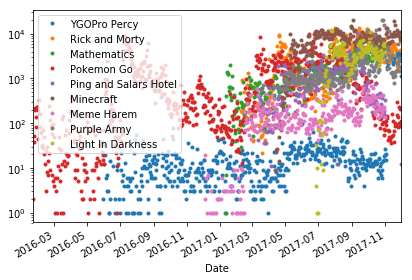

In [59]:
#Combine graphs
#Combine Graphs
fig = plt.figure()
#print gbMessageGrowthYGOProPercy

#Graph by oldest

#For setting x-axis. Just run the graph before then of the server LAST (since all gbs are reset) to get that x-axis at the core
"""gbMessageGrowthYGOProPercy.reset_index(drop=True)
gbMessageGrowthYGOProPercy.columns = ["Date","Messsages"]

gbMessageGrowthRickAndMorty.reset_index(drop=True)
gbMessageGrowthRickAndMorty.columns = ["Date","Messsages"]

gbMessageGrowthMath.reset_index(drop=True)
gbMessageGrowthMath.columns = ["Date","Messsages"]

gbMessageGrowthPokemonGo.reset_index(drop=True)
gbMessageGrowthPokemonGo.columns = ["Date","Messsages"]

gbMessageGrowthPingandSalarsHotel.reset_index(drop=True)
gbMessageGrowthPingandSalarsHotel.columns = ["Date","Messsages"]

gbMessageGrowthMinecraft.reset_index(drop=True)
gbMessageGrowthMinecraft.columns = ["Date","Messsages"]

gbMessageGrowthMeme.reset_index(drop=True)
gbMessageGrowthMeme.columns = ["Date","Messsages"]

gbMessageGrowthPurpleArmy.reset_index(drop=True)
gbMessageGrowthPurpleArmy.columns = ["Date","Messsages"]

gbMessageGrowthLID.reset_index(drop=True)
gbMessageGrowthLID.columns = ["Date","Messsages"]"""

"""ax = gbMessageGrowthYGOProPercy.plot(x="Date", y="Messsages", style=".", x_compat=True)
ax2 = gbMessageGrowthRickAndMorty.plot(ax=ax, x="Date", y="Messsages", style=".", x_compat=True)
ax3 = gbMessageGrowthMath.plot(ax=ax2, x="Date", y="Messsages", style=".", x_compat=True)
ax4 = gbMessageGrowthPokemonGo.plot(ax=ax3, x="Date", y="Messsages", style=".", x_compat=True)
ax5 = gbMessageGrowthPingandSalarsHotel.plot(ax=ax4, x="Date", y="Messsages", style=".", x_compat=True)
ax6 = gbMessageGrowthMinecraft.plot(ax=ax5, x="Date", y="Messsages", style=".", x_compat=True)
ax7 = gbMessageGrowthMeme.plot(ax=ax6, x="Date", y="Messsages", style=".", x_compat=True)
ax8 = gbMessageGrowthPurpleArmy.plot(ax=ax7, x="Date", y="Messsages", style=".", x_compat=True)
ax9 = gbMessageGrowthLID.plot(ax=ax8, x="Date", y="Messsages", style=".", x_compat=True)"""
"""gb2 = gbMessageGrowthRickAndMorty.reset_index(drop=True)
gb2.columns = ["Date","Messsages"]
retweets = gb2.plot(x="Date", y="Messsages", style=".")"""

"""print gbMessageGrowthYGOProPercy.columns 
#gbMessageGrowthYGOProPercy.reindex()
df = gbMessageGrowthYGOProPercy.reset_index(drop=True)
print df
df.plot(kind='scatter',x='year',y='value')"""
#ax3 = gbMessageGrowthYGOProPercy.plot.scatter(dates, messages, x_compat=True)
#ax3 = gbMessageGrowthRickAndMorty.plot.scatter(x='Date', y='Messages', x_compat=True)
#ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
#plt.xticks(rotation=90)

"""#Relabel legend
plt.tight_layout()
ax9.legend(["YGOPro Percy", "Rick and Morty", "Mathematics", "Pokemon Go" ,"Ping and Salars Hotel" , "Minecraft", "Meme Harem", "Purple Army", "Light In Darkness"]);
ax3.set_yscale('log')

retweetsImage = ax9.get_figure()
#retweetsImage.savefig('CombinedServersScatter.png')
retweetsImage.savefig('CombinedServersScatterLog.png')"""

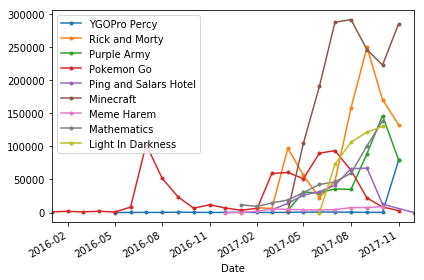

In [23]:
#Combine graphs Line Months
#Combine Graphs
fig = plt.figure()
#print gbMessageGrowthYGOProPercy

#Graph by oldest

#For setting x-axis. Just run the graph before then of the server LAST (since all gbs are reset) to get that x-axis at the core

ax = gbMessageGrowthYGOProPercy.plot(style='.-', x_compat=True)
ax2 = gbMessageGrowthRickAndMorty.plot(ax=ax, style='.-', x_compat=True)
ax3 = gbMessageGrowthPurpleArmy.plot(ax=ax2, style='.-', x_compat=True)
ax4 = gbMessageGrowthPokemonGo.plot(ax=ax3, style='.-', x_compat=True)
ax5 = gbMessageGrowthPingandSalarsHotel.plot(ax=ax4, style='.-', x_compat=True)
ax6 = gbMessageGrowthMinecraft.plot(ax=ax5, style='.-', x_compat=True)
ax7 = gbMessageGrowthMeme.plot(ax=ax6, style='.-', x_compat=True)
ax8 = gbMessageGrowthMath.plot(ax=ax7, style='.-', x_compat=True)
ax9 = gbMessageGrowthLID.plot(ax=ax8, style='.-', x_compat=True)


#ax.set_xticklabels(gb['Date'].dt.strftime('%b, %Y'))
#plt.xticks(rotation=90)

#Relabel legend
plt.tight_layout()
ax9.legend(["YGOPro Percy", "Rick and Morty", "Purple Army", "Pokemon Go" ,"Ping and Salars Hotel" , "Minecraft", "Meme Harem", "Mathematics", "Light In Darkness"]);
#ax9.set_yscale('log')

retweetsImage = ax9.get_figure()
retweetsImage.savefig('CombinedServersMessagesLine.png')
#retweetsImage.savefig('CombinedServersMessagesLineLog.png')